In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
x = np.arange(0,100,0.1)
y = np.exp(x/20)

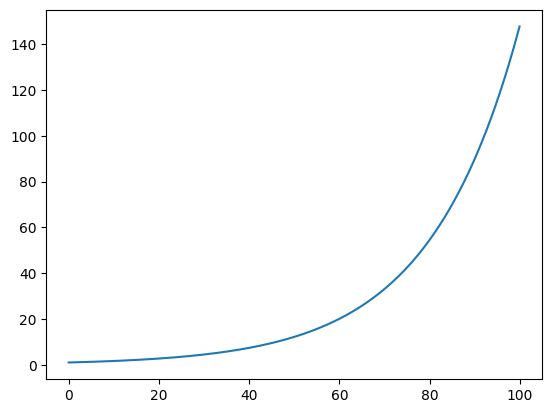

In [10]:
plt.plot(x, y)
plt.show()

In [33]:
df = np.diff(y)/0.1
""" for i in range(len(x)-1):
    df[i] = (y[i + 1] - y[i])/0.1 """

' for i in range(len(x)-1):\n    df[i] = (y[i + 1] - y[i])/0.1 '

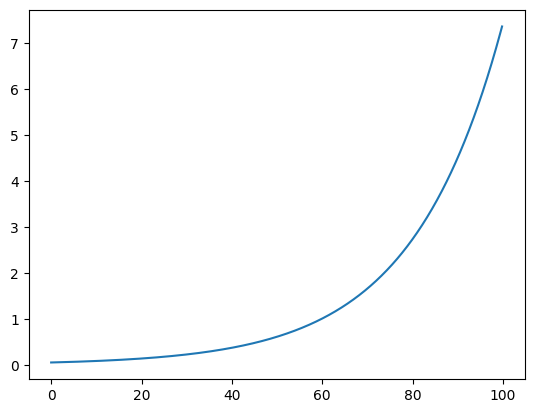

In [34]:
plt.plot(x[:-1], df)
plt.show()

In [35]:
z = np.zeros(len(x))
z[0] = 1
for i in range(len(x)-1):
    z[i+1] = z[i] + y[i] * 0.1/20  

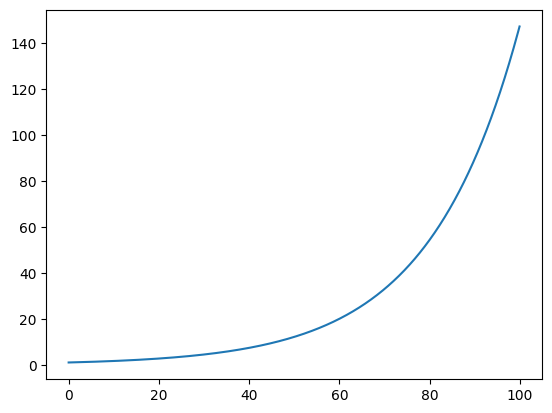

In [36]:
plt.plot(x, z)

In [50]:
funcao = np.zeros(len(x))
funcao[0] = 1
funcao[1:] = np.exp(x[1:]/20)*0.1/20

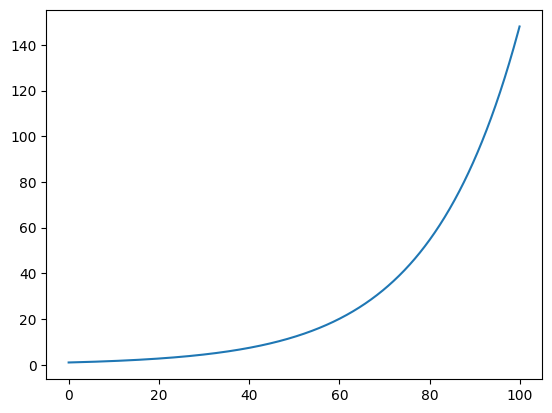

In [53]:
plt.plot(x,np.cumsum(funcao))
plt.show()

In [61]:
def fx(x,y) :
    return 3*x-2*y

In [66]:
dx = 0.1
resultado = np.zeros(len(x))
resultado[0] = 1
for i in range(len(x)-1):
    k1 = fx(x[i], resultado[i])
    k2 = fx(x[i] + dx/2, resultado[i] + dx/2 * k1)
    k3 = fx(x[i] + dx/2, resultado[i] + dx/2 * k2)
    k4 = fx(x[i] + dx, resultado[i] + dx * k3)    
    resultado[i+1] = resultado[i] + (k1 + 2 * k2 + 2* k3 + k4)*dx/6

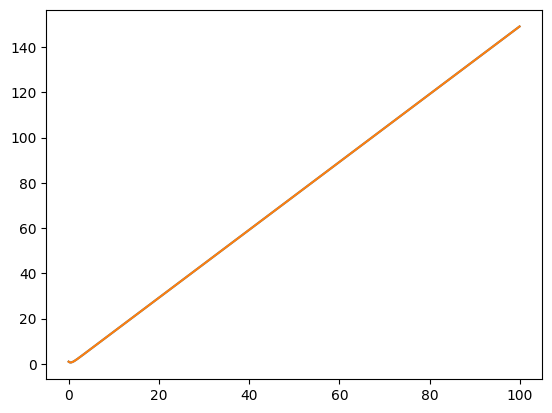

In [69]:
_ = 3/2*x -3/4 + 7/4*np.exp(-2*x)
plt.plot(x,resultado)
plt.plot(x,_) 
plt.show()

In [177]:
particulas = 10
np.random.seed(42)
posicoes = np.random.uniform(-20,20,size = (particulas, 2))
velocidade = np.random.uniform(-0.5,0.5,size = (particulas, 2))

In [178]:
velocidade

array([[ 0.11185289, -0.36050614],
       [-0.20785535, -0.13363816],
       [-0.04393002,  0.28517596],
       [-0.30032622,  0.01423444],
       [ 0.09241457, -0.45354959],
       [ 0.10754485, -0.32947588],
       [-0.43494841,  0.44888554],
       [ 0.46563203,  0.30839735],
       [-0.19538623, -0.40232789],
       [ 0.18423303, -0.05984751]])

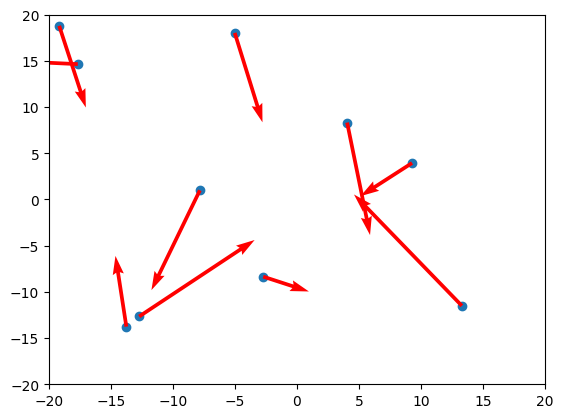

In [179]:

plt.scatter(posicoes.T[0],posicoes.T[1])
plt.quiver(posicoes[:, 0], posicoes[:, 1], velocidade.T[0], velocidade.T[1], color='r', label='Velocidades', scale=2)
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.show()

In [180]:
def calcula_forca(r):
    if(r == 0):
        return 0 
    sigma6 = 1/np.power(2,1/6)
    return -6/np.power(r,7)*sigma6*(2/np.power(r,6)*sigma6 - 1)

In [181]:
m = 100
dt = 0.01
steps = 100
for tempo in range(steps):
    for i in range(len(posicoes)):
        forca = 0
        for j in range(0,len(posicoes)):
            x = posicoes[i] - posicoes[j]
            norma = np.power(x[0]**2 + x[1]**2,1/2)
            forca += calcula_forca(norma)
        velocidade[i] = velocidade[i] + forca/m*dt
        posicoes[i] = posicoes[i] + velocidade[i] * dt


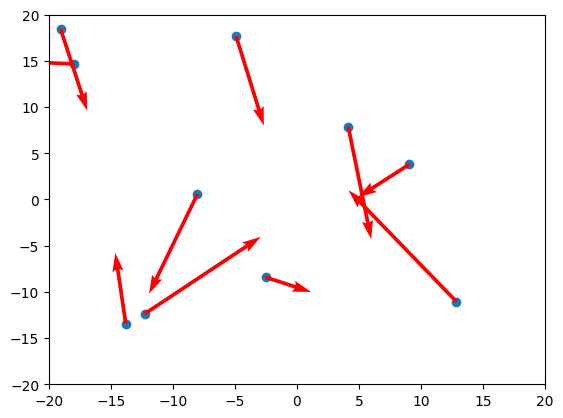

In [182]:
plt.scatter(posicoes.T[0],posicoes.T[1])
plt.quiver(posicoes[:, 0], posicoes[:, 1], velocidade.T[0], velocidade.T[1], color='r', label='Velocidades', scale=2)
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.show()